In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [43]:
now = datetime.now()

start = datetime(now.year - 10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

C:\Users\user\AppData\Local\Temp\ipykernel_9552\152584755.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-20,25.315342,25.697375,25.086121,25.636700,274006400
2015-08-21,23.766975,25.146790,23.742255,24.816443,513102000
2015-08-24,23.173706,24.450148,20.674757,21.319720,648825200
2015-08-25,23.313030,24.969258,23.259097,24.969258,414406400
2015-08-26,24.650145,24.695089,23.607418,24.065857,387098400
...,...,...,...,...,...
2025-08-13,233.330002,235.000000,230.429993,231.070007,69878500
2025-08-14,232.779999,235.119995,230.850006,234.059998,51916300


# 2. Data Exploration and Vitualization

In [44]:
type(df)

pandas.core.frame.DataFrame

In [45]:
df.shape

(2514, 5)

In [46]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [47]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,105.756347,106.819352,104.584016,105.655406,1.075465e+08
std,69.430356,70.112800,68.665585,69.355298,6.234571e+07
min,20.624050,20.927678,20.425436,20.546428,2.323470e+07
25%,39.910991,40.328254,39.591434,39.964710,6.557365e+07
50%,107.378311,109.255667,105.753874,107.435460,9.289040e+07
75%,166.754135,168.308966,165.324827,167.118080,1.303750e+08
max,258.103729,259.179926,256.718662,257.276679,6.488252e+08


In [48]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [49]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-20,25.315342,25.697375,25.086121,25.636700,274006400
2015-08-21,23.766975,25.146790,23.742255,24.816443,513102000
2015-08-24,23.173706,24.450148,20.674757,21.319720,648825200
2015-08-25,23.313030,24.969258,23.259097,24.969258,414406400
2015-08-26,24.650145,24.695089,23.607418,24.065857,387098400


In [50]:
df = df.reset_index()

In [51]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-20,25.315342,25.697375,25.086121,25.636700,274006400
1,2015-08-21,23.766975,25.146790,23.742255,24.816443,513102000
2,2015-08-24,23.173706,24.450148,20.674757,21.319720,648825200
3,2015-08-25,23.313030,24.969258,23.259097,24.969258,414406400
4,2015-08-26,24.650145,24.695089,23.607418,24.065857,387098400


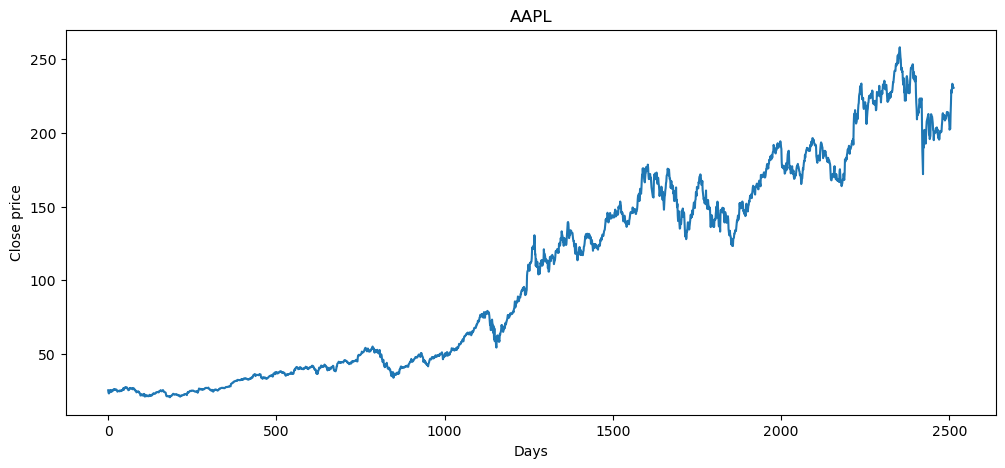

In [52]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days');
plt.ylabel('Close price');


# 3. Feature Engineering

- Moving Average -> to identify the stock like whether it is in theh uptrend or downtrend.
- In other words, so the Moving Average will give you the smooth pattern of the stock trends. 

In [53]:
# 10, 20, 30,40, 50,60, 70, 80, 90, 100

# MA of 6 days ==> null null null null 30 40 


### calculating the average theh sum of numbers

In [54]:
temp_df = [10, 20, 30,40, 50,60, 70, 80, 90, 100]
print(sum(temp_df[1:6])/5)

40.0


### calculating the Moving Average with python function

In [55]:
df1 = pd.DataFrame([10, 20, 30,40, 50,60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [56]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


# 100 Days moving average

In [57]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-20,25.315342,25.697375,25.086121,25.636700,274006400,NaN
1,2015-08-21,23.766975,25.146790,23.742255,24.816443,513102000,NaN
2,2015-08-24,23.173706,24.450148,20.674757,21.319720,648825200,NaN
3,2015-08-25,23.313030,24.969258,23.259097,24.969258,414406400,NaN
4,2015-08-26,24.650145,24.695089,23.607418,24.065857,387098400,NaN


In [58]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-20,25.315342,25.697375,25.086121,25.636700,274006400,NaN
1,2015-08-21,23.766975,25.146790,23.742255,24.816443,513102000,NaN
2,2015-08-24,23.173706,24.450148,20.674757,21.319720,648825200,NaN
3,2015-08-25,23.313030,24.969258,23.259097,24.969258,414406400,NaN
4,2015-08-26,24.650145,24.695089,23.607418,24.065857,387098400,NaN
...,...,...,...,...,...,...,...
98,2016-01-11,22.236982,22.356596,21.968414,22.336285,198957600,NaN
99,2016-01-12,22.559719,22.724472,22.306949,22.692876,196616800,25.350327
100,2016-01-13,21.979704,22.837317,21.959393,22.640968,249758400,25.316970


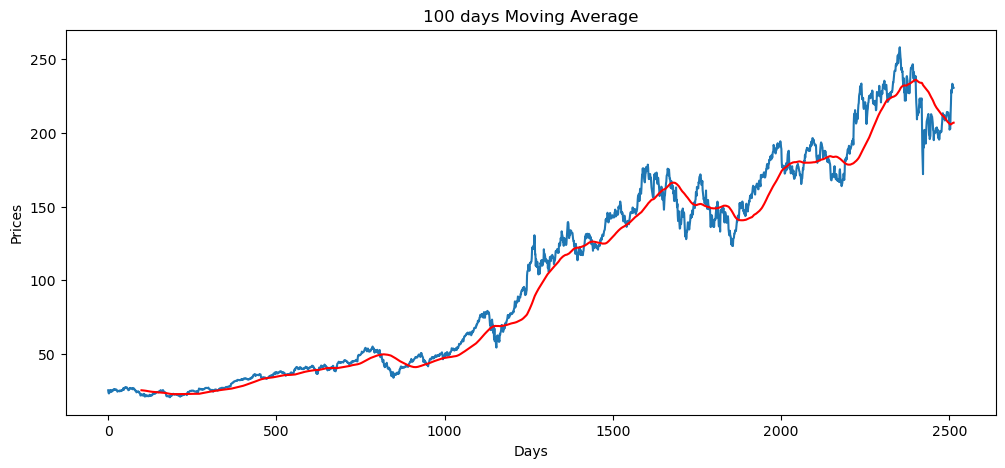

In [59]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r');
plt.title('100 days Moving Average')
plt.xlabel('Days');
plt.ylabel('Prices');


# 200 Days moving average

In [60]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-20,25.315342,25.697375,25.086121,25.636700,274006400,NaN,NaN
1,2015-08-21,23.766975,25.146790,23.742255,24.816443,513102000,NaN,NaN
2,2015-08-24,23.173706,24.450148,20.674757,21.319720,648825200,NaN,NaN
3,2015-08-25,23.313030,24.969258,23.259097,24.969258,414406400,NaN,NaN
4,2015-08-26,24.650145,24.695089,23.607418,24.065857,387098400,NaN,NaN


In [61]:
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-20,25.315342,25.697375,25.086121,25.636700,274006400,NaN,NaN
1,2015-08-21,23.766975,25.146790,23.742255,24.816443,513102000,NaN,NaN
2,2015-08-24,23.173706,24.450148,20.674757,21.319720,648825200,NaN,NaN
3,2015-08-25,23.313030,24.969258,23.259097,24.969258,414406400,NaN,NaN
4,2015-08-26,24.650145,24.695089,23.607418,24.065857,387098400,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-06-03,22.354515,22.434418,22.247217,22.324838,114019600,22.718805,NaN
199,2016-06-06,22.516605,23.260843,22.270050,22.370498,93170000,22.718374,24.034350
200,2016-06-07,22.607916,22.799683,22.591935,22.658141,89638000,22.724656,24.020813


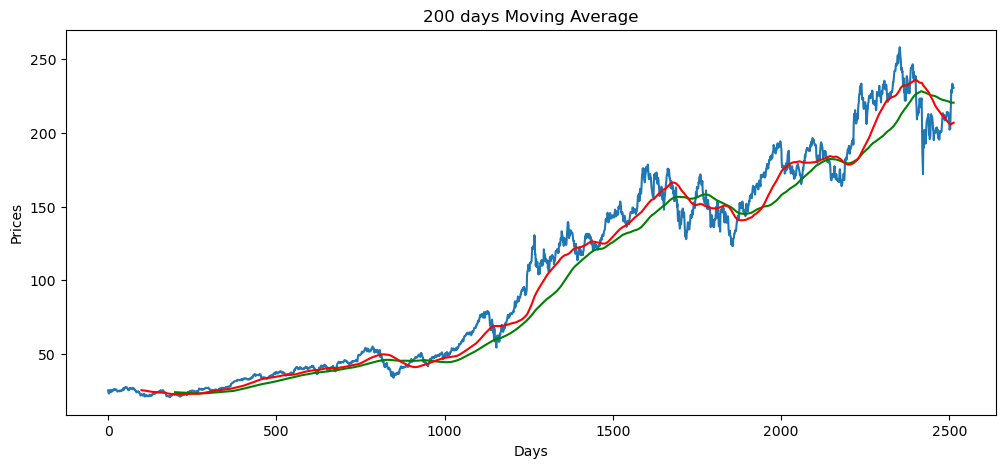

In [62]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_200'], 'g');
plt.plot(df['MA_100'], 'r');
plt.title('200 days Moving Average')
plt.xlabel('Days');
plt.ylabel('Prices');


In [63]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-20,25.315342,25.697375,25.086121,25.636700,274006400,NaN,NaN
1,2015-08-21,23.766975,25.146790,23.742255,24.816443,513102000,NaN,NaN
2,2015-08-24,23.173706,24.450148,20.674757,21.319720,648825200,NaN,NaN
3,2015-08-25,23.313030,24.969258,23.259097,24.969258,414406400,NaN,NaN
4,2015-08-26,24.650145,24.695089,23.607418,24.065857,387098400,NaN,NaN
...,...,...,...,...,...,...,...,...
2509,2025-08-13,233.330002,235.000000,230.429993,231.070007,69878500,206.466163,220.484608
2510,2025-08-14,232.779999,235.119995,230.850006,234.059998,51916300,206.616593,220.500999
2511,2025-08-15,231.589996,234.279999,229.339996,234.000000,56038700,206.730583,220.507258


## Calculating % changed in each trading session

In [64]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,25.315342,NaN
1,23.766975,-0.061163
2,23.173706,-0.024962
3,23.313030,0.006012
4,24.650145,0.057355
...,...,...
2509,233.330002,0.016024
2510,232.779999,-0.002357
2511,231.589996,-0.005112


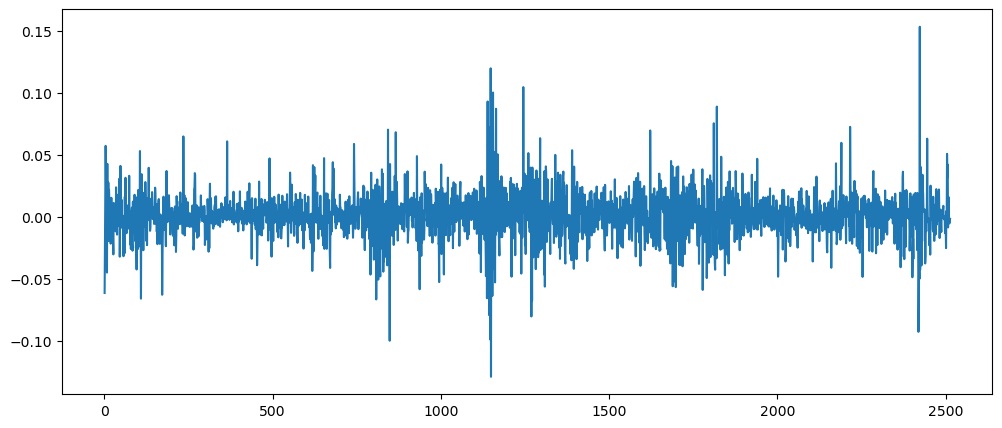

In [65]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

# 4. Data Preprocessing

In [66]:
df.shape

(2514, 9)

## Splitting the data into training and testing datasets


In [67]:
data_training = pd.DataFrame(df.Close[0: int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        25.315342
1        23.766975
2        23.173706
3        23.313030
4        24.650145
...            ...
1754    162.357117
1755    166.609985
1756    165.871658
1757    169.425552
1758    170.498596

[1759 rows x 1 columns]
Ticker        AAPL
1759    170.341080
1760    171.837509
1761    171.443680
1762    168.854553
1763    164.965973
...            ...
2509    233.330002
2510    232.779999
2511    231.589996
2512    230.889999
2513    230.559998

[755 rows x 1 columns]


In [68]:
data_training

Ticker,AAPL
0,25.315342
1,23.766975
2,23.173706
3,23.313030
4,24.650145
...,...
1754,162.357117
1755,166.609985
1756,165.871658
1757,169.425552


In [69]:
data_testing

Ticker,AAPL
1759,170.341080
1760,171.837509
1761,171.443680
1762,168.854553
1763,164.965973
...,...
2509,233.330002
2510,232.779999
2511,231.589996
2512,230.889999


### Scaling down the data between 0 - 1
- Because computers only understand only 0 and 1

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [71]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02972576],
       [0.01991474],
       [0.01615556],
       ...,
       [0.9203426 ],
       [0.94286138],
       [0.94966059]], shape=(1759, 1))

In [72]:
type(data_training_array)

numpy.ndarray

In [73]:
data_training_array.shape

(1759, 1)

### 5. Sequence Creation

In [74]:
12, 13, 14, 15, 16, 17, 18, 19, 20, 21

(12, 13, 14, 15, 16, 17, 18, 19, 20, 21)

In [75]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [76]:
y_train

array([0.00858992, 0.01163592, 0.00821811, ..., 0.9203426 , 0.94286138,
       0.94966059], shape=(1659,))

In [77]:
x_train.ndim

3

In [78]:
y_train.ndim

1

In [79]:
x_train.shape

(1659, 100, 1)

In [80]:
y_train.shape

(1659,)

## 6. Model Building
- #Tensorflow -> it is  aaframework for numerical computation and maachinne learning.
- it provides various tools for building and deploying deep learning models
- #keras -> it is a high level API for building and training neural netwroks

In [82]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [83]:
#ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [87]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

## 7.  Model Traaining

In [88]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - loss: 0.0088
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - loss: 5.8637e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 5.5390e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 5.8443e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - loss: 5.8641e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - loss: 5.1908e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - loss: 5.4999e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - loss: 4.7669e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - loss: 5.1558e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - loss: 4.3222e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - loss: 4.1653e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - loss: 3.9427e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - loss: 4.4866e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - loss: 4.5968e-

In [90]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
# Save the trained model
model.save('Stock_prediction_model.keras')

## 8. Preparing Test Data

In [91]:
data_training.tail(100)

Ticker,AAPL
1659,167.086990
1660,170.876205
1661,171.514206
1662,172.378098
1663,175.676422
...,...
1754,162.357117
1755,166.609985
1756,165.871658
1757,169.425552


In [92]:
data_testing

Ticker,AAPL
1759,170.341080
1760,171.837509
1761,171.443680
1762,168.854553
1763,164.965973
...,...
2509,233.330002
2510,232.779999
2511,231.589996
2512,230.889999


In [95]:
past_100_days = data_training.tail(100)

In [96]:
past_100_days

Ticker,AAPL
1659,167.086990
1660,170.876205
1661,171.514206
1662,172.378098
1663,175.676422
...,...
1754,162.357117
1755,166.609985
1756,165.871658
1757,169.425552


In [100]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,167.086990
1,170.876205
2,171.514206
3,172.378098
4,175.676422
...,...
850,233.330002
851,232.779999
852,231.589996
853,230.889999


In [101]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.24913759e-01],
       [3.53018996e-01],
       [3.57751151e-01],
       [3.64158778e-01],
       [3.88622998e-01],
       [3.79958736e-01],
       [3.56950311e-01],
       [3.54766222e-01],
       [3.84837116e-01],
       [3.60227124e-01],
       [3.36709176e-01],
       [3.38966151e-01],
       [3.24040033e-01],
       [2.92440231e-01],
       [3.06346964e-01],
       [3.26297121e-01],
       [2.89090646e-01],
       [2.87488852e-01],
       [3.04453740e-01],
       [3.03216263e-01],
       [2.97318498e-01],
       [2.63607041e-01],
       [2.71543349e-01],
       [2.27274518e-01],
       [2.25599838e-01],
       [2.77077137e-01],
       [2.33463374e-01],
       [2.35720575e-01],
       [2.46787585e-01],
       [2.94406342e-01],
       [2.27056086e-01],
       [2.32451911e-01],
       [1.94388799e-01],
       [2.12253784e-01],
       [1.53846659e-01],
       [1.25117025e-01],
       [1.58294514e-01],
       [1.46846663e-01],
       [1.73826355e-01],
       [1.12429547e-01],


In [103]:
input_data.shape

(855, 1)

In [112]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100 : i])
    y_test.append(input_data[i, 0])

In [113]:
x_test, y_test = np.array(x_test), np.array(y_test)